The goal here is to try the algorithm is given data and asked to extract knowledge based on any patterns it is able to find

- Image Clustering

- Topic Identification (when analysing emails, documents articles)

- Dimensionality Reduction


#### HAC: Hierarchical Agglomerative Clustering

how the algorithm thinks of the ‘distance’ between two existing clusters is variable. Scikit-learn provides three such ‘linkage criteria’ as part of its HAC package:


###### HAC starts off by viewing each individual point as its own cluster of one.
It then merges the two existing clusters that are ‘closest’ to each other (note; the definition of ‘distance’ in this context is changeable — we’ll explore this later on). The HAC algorithm will iteratively merge ‘close’ clusters, until it reaches its natural conclusion where all data points belong to one single cluster.

- ward (default): picks the two clusters to merge in a way that the variance within all clusters increases the least.Generally, this leads to clusters that are fairly equally sized.
- average: merges the two clusters that have the smallest average distance between all the points.
- complete (or maximum linkage): merges the two clusters that have the smallest maximum distance between their points.



In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mglearn

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('my_data.csv')

data.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.696,0.875000,0.1000,0.0373,128.276,257220,4,1
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.463,0.056000,0.1030,0.3040,73.996,255030,4,1
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.777,0.329000,0.0967,0.5290,99.622,228460,4,1
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.289,0.714000,0.0961,0.9540,173.851,224107,4,1
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.850,0.000353,0.1140,0.2340,86.909,255533,4,1


In [3]:
data =  data.dropna()

### Exploratory Analysis

In [4]:
data.dtypes

id                   object
title                object
main_artist          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
Like                  int64
dtype: object

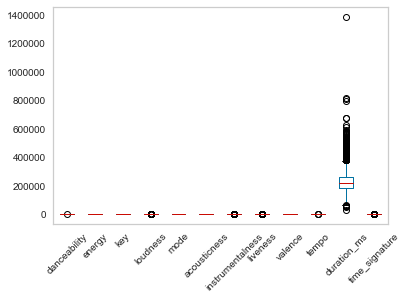

In [5]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']


data.boxplot(features, grid=False, rot=45, fontsize=10)


In [6]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
danceability,1.000000,0.062039,0.016643,0.279247,-0.122610,-0.074156,-0.139850,-0.080928,0.523299,-0.069122,-0.389300,0.148891,-0.180245
energy,0.062039,1.000000,0.010035,0.737551,-0.051832,-0.734008,-0.177746,0.180211,0.390527,0.199763,0.023120,0.156666,-0.595209
key,0.016643,0.010035,1.000000,-0.023780,-0.131031,-0.004551,0.022040,-0.012629,0.011916,-0.005217,-0.035193,-0.008799,-0.003121
loudness,0.279247,0.737551,-0.023780,1.000000,-0.074167,-0.545292,-0.374980,0.087556,0.393779,0.138149,-0.104683,0.147276,-0.559831
mode,-0.122610,-0.051832,-0.131031,-0.074167,1.000000,0.061559,-0.010765,0.002164,-0.053309,-0.002407,0.018916,-0.051913,0.056580
acousticness,-0.074156,-0.734008,-0.004551,-0.545292,0.061559,1.000000,0.154207,-0.107108,-0.262904,-0.172892,-0.084527,-0.116281,0.521724
instrumentalness,-0.139850,-0.177746,0.022040,-0.374980,-0.010765,0.154207,1.000000,-0.058640,-0.159249,-0.030166,0.042699,-0.048235,0.319217
liveness,-0.080928,0.180211,-0.012629,0.087556,0.002164,-0.107108,-0.058640,1.000000,0.046407,0.035224,-0.003220,-0.034971,-0.076785
valence,0.523299,0.390527,0.011916,0.393779,-0.053309,-0.262904,-0.159249,0.046407,1.000000,0.111843,-0.295536,0.121524,-0.267845
tempo,-0.069122,0.199763,-0.005217,0.138149,-0.002407,-0.172892,-0.030166,0.035224,0.111843,1.000000,0.031704,0.024543,-0.157498


### Data Preprocessing: FEATURE ENGINEERING

Given that HAC deals with ‘distances’ — abstract or otherwise — we need to standard-scale our data before feeding it into the clustering algorithm. 
- This ensures that our final results are not skewed by feature units. 
- For example, tempo typically ranges between 70 and 180 beats per minute, whereas most other measures fall somewhere between 0 and 1. Without scaling, two songs with very different tempos would always be very ‘far apart’, even if they were identical on the other metrics.

In [7]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit_transform(data[features])

#data_scaled = scaler.transform(data[features])


scaler = StandardScaler()
scaler.fit(data[features])

features_scaled = scaler.transform(data[features])

In [8]:
features_scaled

array([[-1.800976  , -1.34409076, -0.97333845, ...,  0.24395489,
         0.30425443,  0.17427667],
       [ 0.08549885, -1.20870404, -1.52998282, ..., -1.51736465,
         0.2771843 ,  0.17427667],
       [-0.40464265, -0.78070734,  1.25323903, ..., -0.68583233,
        -0.05124189,  0.17427667],
       ...,
       [ 1.31655192, -0.53613779, -0.1383719 , ..., -1.41969384,
        -0.748341  ,  0.17427667],
       [ 0.90050157, -0.50993391, -1.52998282, ...,  0.9513382 ,
        -0.75685758,  0.17427667],
       [ 0.91759953, -0.22605854,  1.25323903, ..., -0.73742588,
         0.37731906,  0.17427667]])

## PCA: Principal Component Analysis

A PCA transform attempts to find the orthogonal set of vectors that account for as much of the variability of the dataset in as few components as possible. 

- The first principal component will encompass as much of the dataset variation as possible in 1 dimension, 
- the second component will encompass as much as possible of the remaining variation as possible while remaining orthogonal to the first, and so on

In [9]:
from sklearn.decomposition import PCA

# create the PCA object
# the number of components chosen will be the new number of features!!!!!!!
pca = PCA(n_components = 3)

# fit the PCA model to breast cancer data

pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# it's like we have two new axis (those defined by the PCA principal components)
features_pca = pca.transform(features_scaled)

In [11]:
features_pca

array([[ 3.50229308,  1.15856678, -0.22418743],
       [ 1.475722  , -0.36674307, -1.60508842],
       [ 1.54349002, -0.75116616,  0.40038674],
       ...,
       [-0.57492248, -2.6005259 ,  0.25313067],
       [-1.03352419, -1.01877122, -0.48757819],
       [ 0.36209409, -0.99369018,  1.51178491]])

Text(0, 0.5, 'Second principal component')

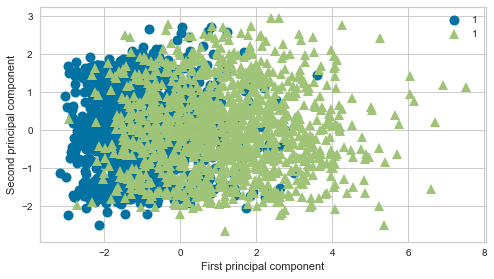

In [12]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(features_pca[:, 0], features_pca[:, 2], data['Like'])
plt.legend(data['Like'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

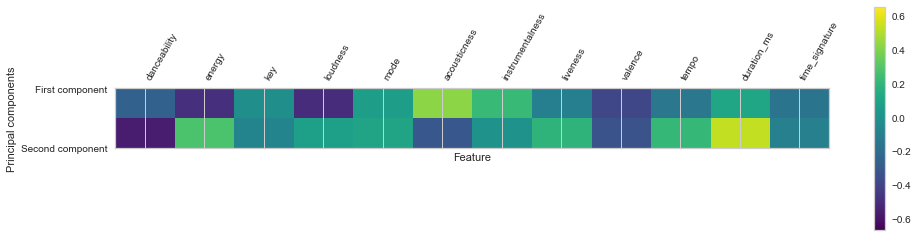

In [13]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(data[features].columns)),data[features], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# mathematically, the new features (principal components) are a LINEAR COMBINATION of the previous (old) features
# the weights of each of them as represented in the diagram above

## Clustering Techniques

- Clustering is the task of partitioning the dataset into groups of similarity called clusters

- Clustering algorithms assign a number to each datapoint indicating which cluster it belongs to.

### Data Clustering with K-Means

In the end you are left with areas that identify in which a cluster a newly assigned point would be  classified.

In [16]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(features_scaled)
data['labels'] = model.labels_

In [17]:
data['labels'].value_counts()

0    1696
1     949
Name: labels, dtype: int64

In [18]:
data.groupby('labels').mean()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
labels,,,,,,,,,,,,,
0,0.642383,0.729003,5.481722,-6.322006,0.564858,0.194066,0.061586,0.195900,0.583243,125.080671,228339.899764,3.977594,0.265920
1,0.549336,0.363214,5.524763,-11.722690,0.639621,0.670293,0.214055,0.151355,0.331154,113.032334,240228.795574,3.863014,0.889357


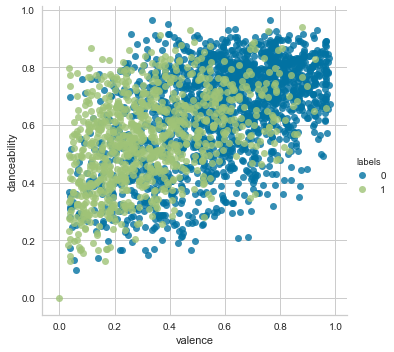

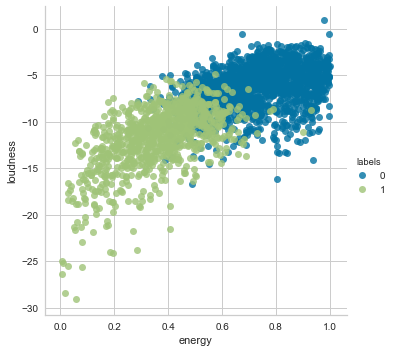

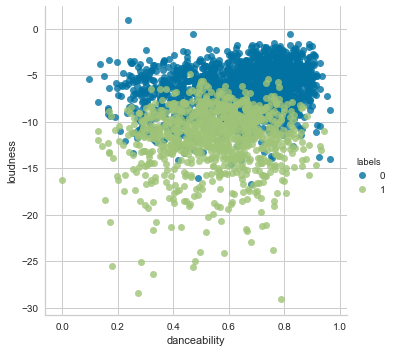

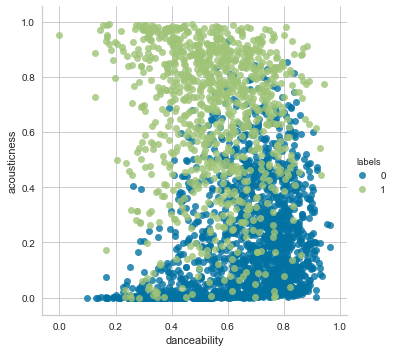

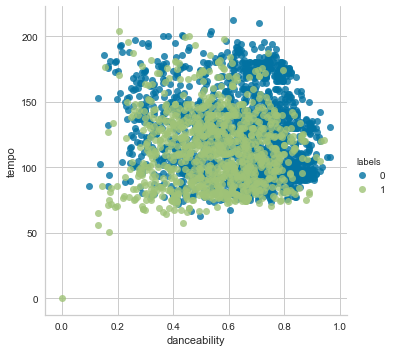

In [20]:
sns.lmplot(data=data, x='valence', y='danceability', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data, x='energy', y='loudness', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data, x='danceability', y='loudness', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data, x='danceability', y='acousticness', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data, x='danceability', y='tempo', hue='labels',  fit_reg=False, legend=True, legend_out=True)

#### Optimal Number of Clusters

One of the hardest and most important parameters to optimize is the number of clusters. 

- Having too many clusters might mean that we haven't actually learned much about the data - the whole point of clustering is to identify a relatively small number of similarities that exist in the dataset. 

- Too few clusters might mean that we are grouping unlike samples together artificially. 

There are many different methods for choosing the appropriate number of clusters, but one common method is calculating a metric for each number of clusters, then plotting the error function vs the number of clusters. 

##### Yellowbrick's KElbowVisualizer:

Yellowbrick's KElbowVisualizer implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for K.



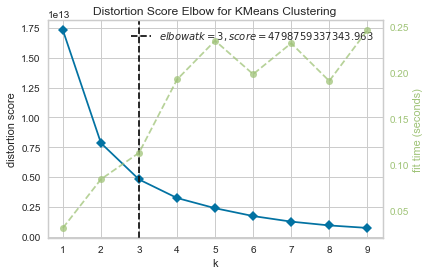

In [21]:
X = data[features]
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#fits the model for a range of  K  values from 1 to 9, which is set by the parameter k=(1,10). 
#we see that the model is fit with 3 clusters - we can see an "elbow" in the graph, 
#which in this case we know to be the optimal number since we created our synthetic dataset with 8 clusters of points.


By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. 

However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. 

The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

### Data Clustering with DBSCAN